<a href="https://colab.research.google.com/github/kungfumas/aplikasi-deep-learning/blob/master/pycaretregresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
pip install jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
import jinja2
from pycaret.regression import *
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [37]:
dataset=pd.read_csv('/content/drive/MyDrive/permatasakti/50_Startups.csv')
dataset.head

<bound method NDFrame.head of     R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  

In [38]:
# Mengimpor library yang diperlukan
import numpy as np
import pandas as pd
 
# Mengimpor dataset
dataset = pd.read_csv('/content/drive/MyDrive/permatasakti/50_Startups.csv')
X = dataset.iloc[:, :-1].values
Tampilkan_X = pd.DataFrame(X) #visualisasi X
y = dataset.iloc[:, 4].values
 
# Encode data kategori
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
        [('encoder', OneHotEncoder(), [3])],
        remainder='passthrough')
X = np.array(transformer.fit_transform(X), dtype=np.float)
 
# Menghindari jebakan dummy variabel
X = X[:, 1:]
 
# Membagi data menjadi the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
 

In [39]:
X_train

array([[1.0000000e+00, 0.0000000e+00, 5.5493950e+04, 1.0305749e+05,
        2.1463481e+05],
       [0.0000000e+00, 1.0000000e+00, 4.6014020e+04, 8.5047440e+04,
        2.0551764e+05],
       [1.0000000e+00, 0.0000000e+00, 7.5328870e+04, 1.4413598e+05,
        1.3405007e+05],
       [0.0000000e+00, 0.0000000e+00, 4.6426070e+04, 1.5769392e+05,
        2.1079767e+05],
       [1.0000000e+00, 0.0000000e+00, 9.1749160e+04, 1.1417579e+05,
        2.9491957e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05],
       [1.0000000e+00, 0.0000000e+00, 1.1994324e+05, 1.5654742e+05,
        2.5651292e+05],
       [0.0000000e+00, 1.0000000e+00, 1.0002300e+03, 1.2415304e+05,
        1.9039300e+03],
       [0.0000000e+00, 1.0000000e+00, 5.4205000e+02, 5.1743150e+04,
        0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 6.5605480e+04, 1.5303206e+05,
        1.0713838e+05],
       [0.0000000e+00, 1.0000000e+00, 1.1452361e+05, 1.2261684e+05,
        2.61

In [40]:
train_data=pd.DataFrame(X_train,columns=['R&D Spend','Administration','Marketing Spend','State','Profit'])

In [41]:
test_data=pd.DataFrame(X_test,columns=['R&D Spend','Administration','Marketing Spend','State','Profit'])

In [42]:
s=setup(data=train_data,target='Profit',session_id=123,use_gpu=True)

,Description,Value
0,session_id,123
1,Target,Profit
2,Original Data,"(40, 5)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(27, 4)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='Profit',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [43]:
compare_models(sort='MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
en,Elastic Net,80809.2777,9.616324e+09,90216.9316,-214.7233,1.3620,2.5847,0.010
br,Bayesian Ridge,83285.5238,9.923506e+09,93188.8967,-164.0186,1.3797,3.3732,0.008
omp,Orthogonal Matching Pursuit,81304.3415,1.005974e+10,90763.3002,-223.6408,1.3673,3.1372,0.009
ridge,Ridge Regression,82533.2797,1.024377e+10,91137.4180,-287.5379,1.3508,2.3138,0.015
llar,Lasso Least Angle Regression,83802.5347,1.053733e+10,92350.9472,-308.0067,1.3518,2.2733,0.011
lasso,Lasso Regression,83802.8996,1.053752e+10,92351.1262,-308.0261,1.3518,2.2730,0.018
lar,Least Angle Regression,83803.2607,1.053764e+10,92351.5416,-308.0385,1.3518,2.2729,0.009
lr,Linear Regression,83803.2652,1.053764e+10,92351.5453,-308.0386,1.3518,2.2729,0.021
lightgbm,Light Gradient Boosting Machine,85929.9219,1.061327e+10,95032.9523,-52.0521,1.3527,4.2985,0.016
dummy,Dummy Regressor,85929.9230,1.061327e+10,95032.9531,-52.0521,1.3527,4.2985,0.005


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 2
INFO:logs:ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
en=create_model('en')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,81119.6484,7.887883e+09,88813.7500,0.3767,2.5364,21.7961
1,132678.3750,1.823217e+10,135026.5625,-11.2852,0.7405,0.5071
2,40126.6367,2.673400e+09,51704.9336,0.7912,0.6951,0.8139
3,113243.7891,1.752529e+10,132383.1250,-6.2741,0.7324,0.4071
4,50670.9727,4.168558e+09,64564.3672,-2.7592,0.3441,0.3427
5,59440.2930,3.771072e+09,61409.0586,0.3832,0.3236,0.3179
6,97992.6797,1.510698e+10,122910.4609,0.4472,7.0375,0.1332
7,32891.5547,1.108036e+09,33287.1758,-2.6528,0.2120,0.2181
8,61215.9062,4.358113e+09,66016.0078,0.0660,0.2646,0.2422


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 4
INFO:logs:ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [49]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,72972.8977,1.147724e+10,107131.8583,0.0931,2.0485,8.0381
1,133870.4323,3.199688e+10,178876.7206,-20.5601,7.2851,0.4828
2,17426.5254,6.150896e+08,24801.0005,0.9520,0.1584,0.1191
3,158594.9608,3.838770e+10,195927.7926,-14.9334,2.9514,0.5369
4,77677.0781,9.813018e+09,99060.6795,-7.8493,0.4739,0.5151
5,108524.1895,1.547477e+10,124397.6146,-1.5309,1.1819,0.5106
6,187179.0807,5.171794e+10,227415.7776,-0.8923,7.3084,0.3437
7,78346.5195,8.396544e+09,91632.6578,-26.6807,0.4262,0.4759
8,105447.3242,1.727341e+10,131428.3274,-2.7021,0.6417,0.3722


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 5
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


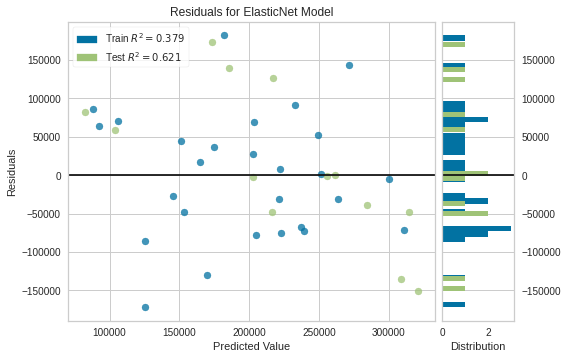

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [51]:
plot_model(en)

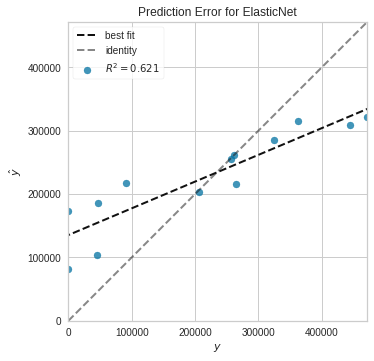

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [52]:
plot_model(en, plot = 'error')

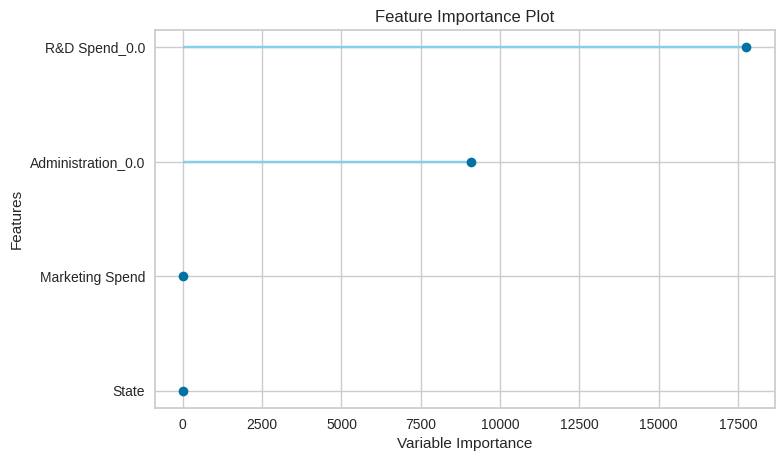

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [53]:
plot_model(en, plot='feature')

In [54]:
evaluate_model(en)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [55]:
tuned_en = tune_model(en)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,143019.6719,2.557295e+10,159915.4531,-1.0206,2.9461,38.2480
1,77476.7422,7.493804e+09,86566.7578,-4.0495,0.3692,0.2761
2,102746.3516,1.255149e+10,112033.4453,0.0198,1.0204,1.6817
3,78145.1953,8.535994e+09,92390.4453,-2.5430,0.3851,0.2646
4,41597.5781,2.149189e+09,46359.3477,-0.9381,0.2709,0.2791
5,65139.3086,6.089777e+09,78037.0234,0.0040,0.4230,0.3964
6,164275.8750,2.840456e+10,168536.5156,-0.0393,7.0404,0.4293
7,44122.4609,2.259855e+09,47537.9297,-6.4500,0.2805,0.3005
8,68533.3984,7.223080e+09,84988.7109,-0.5481,0.3466,0.2428


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 6
INFO:logs:ElasticNet(alpha=9.6, copy_X=True, fit_intercept=True,
           l1_ratio=0.762999999999999, max_iter=1000, normalize=True,
           positive=False, precompute=False, random_state=123,
           selection='cyclic', tol=0.0001, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [57]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.7 MB/s 


In [59]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,72972.8977,1.147724e+10,107131.8583,0.0931,2.0485,8.0381
1,133870.4323,3.199688e+10,178876.7206,-20.5601,7.2851,0.4828
2,17426.5254,6.150896e+08,24801.0005,0.9520,0.1584,0.1191
3,158594.9608,3.838770e+10,195927.7926,-14.9334,2.9514,0.5369
4,77677.0781,9.813018e+09,99060.6795,-7.8493,0.4739,0.5151
5,108524.1895,1.547477e+10,124397.6146,-1.5309,1.1819,0.5106
6,187179.0807,5.171794e+10,227415.7776,-0.8923,7.3084,0.3437
7,78346.5195,8.396544e+09,91632.6578,-26.6807,0.4262,0.4759
8,105447.3242,1.727341e+10,131428.3274,-2.7021,0.6417,0.3722


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 7
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [60]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,89144.6074,1.123384e+10,105989.8199,0.1124,2.5928,21.7753
1,151342.0121,2.965434e+10,172204.3643,-18.9817,1.3017,0.5827
2,31168.6917,1.135408e+09,33695.8104,0.9113,0.5013,0.5108
3,133552.6069,2.813972e+10,167748.9873,-10.6798,1.5225,0.4714
4,81121.8969,1.164809e+10,107926.3230,-9.5042,0.5104,0.5649
5,78606.9768,8.023213e+09,89572.3878,-0.3122,0.7584,0.4288
6,194521.7995,4.503595e+10,212216.7634,-0.6478,7.3046,0.3960
7,92695.3060,9.795925e+09,98974.3657,-31.2941,0.5489,0.5788
8,17339.0242,5.991808e+08,24478.1697,0.8716,0.0833,0.0557


INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 8
INFO:logs:DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=14,
                      max_features='log2', max_leaf_nodes=None,
                      min_impurity_decrease=0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=7,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best'), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


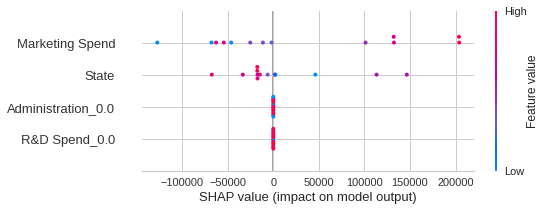

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [61]:
interpret_model(dt)

In [45]:
predict_model(en,data=test_data.drop(['Profit'],axis=1))

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=123, selection='cyclic', tol=0.0001, warm_start=False), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,R&D Spend,Administration,Marketing Spend,State,Label
0,1.0,0.0,66051.52,182645.56,143371.59375
1,0.0,0.0,100671.96,91790.61,286330.56250
2,1.0,0.0,101913.08,110594.11,283547.62500
3,1.0,0.0,27892.92,84710.77,202460.81250
4,1.0,0.0,153441.51,101145.55,372754.87500
5,0.0,1.0,72107.60,127864.55,191032.40625
6,0.0,1.0,20229.59,65947.93,186412.40625
7,0.0,1.0,61136.38,152701.92,144815.06250
8,1.0,0.0,73994.56,122782.75,226782.96875
9,1.0,0.0,142107.34,91391.77,367244.78125


INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=en, fold=None, round=4, n_iter=10, custom_grid=None, optimize=R2, custom_scorer=None, search_library=scikit-learn, search_algorithm=None, early_stopping=False, early_stopping_max_iters=10, choose_better=False, fit_kwargs=None, groups=None, return_tuner=False, verbose=True, tuner_verbose=True, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions


TypeError: ignored